
# SnapTravel Case Study: Data Analyst

# Context
SnapTravel is an online travel agency that sells hotel rooms to consumers through our
automated chat-bot, accessible through Google Hotel Ads, Kayak, and other external meta
channels. We constantly strive to make business changes at each stage of our business funnel
that help users find the best deal in the easiest way possible.
The data dictionary can be found at the end of this document.



Question 1
Using the attached data, find 1-2 things about our booking funnel that you think are important to
track and then create 5 visualizations that would help you track that metric:
- What other data sources would you add assuming they were available?
- Please prepare your presentation for a business audience but be ready to answer
technical questions (perhaps in an appendix).

Question 2
If you were tasked with expanding the snaptravel business into a new area of the world, how
would you approach that problem? What data would you need? Who would you involve?
Provide a brief description of your process (300 words or less).

Data Dictionary
The below table has data on a subset of itineraries from a specific meta channel between the
dates of July 1st 2019 and September 15th, 2019. For these purposes, Snaptravel’s booking
funnel can be defined as:
1. Impression on a Snaptravel ad
2. Transition page open
3. Booking form open
4. Booking

# Field Data

    Type                      Description
    __________________________________________________________
    

SEARCH_DATE            :    date Date that the search occurred on.


HOTEL_ID               :    int Unique identifier for a hotel


CHECK_IN_DATE          :  date Date first night of the users hotel stay


ELIGIBLE_IMPRESSIONS   : int Number of total users that viewed that itinerary (not specific to Snaptravel)


IMPRESSIONS            :  int Number of total users that viewed Snaptravel’s advertisement for the searched itinerary



TRANSITION_PAGE_OPENS  : int Number of times that the transition page that redirects and user to the Snaptravel platform was                            opened


BOOKING_FORM OPENS     :   int Number of times that the booking form that delineates
                        all of the booking details before finalizing the booking
                        
                        

BOOKINGS               : int Number of completed bookings

# reading of file or loading csv file into pandas dataframe
# and importing all the required libraries for initial exploration
# of the dataset 

In [1]:
#importing of libraries in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime


# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#pd.options.display.max_columns=True

# pd.options.display.max_rows=True

In [2]:
#reading of file or loading csv file into pandas dataframe

df = pd.read_csv("funnel_analysis.csv")

df.head()

,SEARCH_DATE,HOTEL_ID,CHECK_IN_DATE,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
0,2019-08-31,122695,2019-08-31,1927,1715,464,83,8
1,2019-09-01,118583,2019-09-01,2052,1114,258,47,3
2,2019-07-03,139402,2019-07-05,2482,1398,282,55,3
3,2019-07-05,122212,2019-07-05,1838,802,207,21,2
4,2019-08-31,125186,2019-09-02,3484,774,200,37,2


In [3]:
#shape of the data 

df.shape

#so there are 74582 rows and 8 columns in the dataset 

(74582, 8)

In [4]:
#general info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74582 entries, 0 to 74581
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SEARCH_DATE            74582 non-null  object
 1   HOTEL_ID               74582 non-null  int64 
 2   CHECK_IN_DATE          74582 non-null  object
 3   ELIGIBLE_IMPRESSIONS   74582 non-null  int64 
 4   IMPRESSIONS            74582 non-null  int64 
 5   TRANSITION_PAGE_OPENS  74582 non-null  int64 
 6   BOOKING_FORM_OPENS     74582 non-null  int64 
 7   BOOKINGS               74582 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 4.0+ MB


# checking data-types and making changes if required 

In [5]:
#checking of dtypes and chaning of data -types if required 

df.dtypes

SEARCH_DATE              object
HOTEL_ID                  int64
CHECK_IN_DATE            object
ELIGIBLE_IMPRESSIONS      int64
IMPRESSIONS               int64
TRANSITION_PAGE_OPENS     int64
BOOKING_FORM_OPENS        int64
BOOKINGS                  int64
dtype: object

In [6]:
#so above we found date search_date and check_in_date are datetype object but here are they 
#are considered as object datatype so it is better to convert it back to original type which is data for them

#so lets make the datatype right for date columns

df["SEARCH_DATE"] = pd.to_datetime(df["SEARCH_DATE"])
df["CHECK_IN_DATE"] = pd.to_datetime(df["CHECK_IN_DATE"])

#also i feel the Hotel id is also seems to be not right
#datatype as integer so it is better to convert it to 
#the category columns 

df["HOTEL_ID"] = df["HOTEL_ID"].astype("category")

df.dtypes

SEARCH_DATE              datetime64[ns]
HOTEL_ID                       category
CHECK_IN_DATE            datetime64[ns]
ELIGIBLE_IMPRESSIONS              int64
IMPRESSIONS                       int64
TRANSITION_PAGE_OPENS             int64
BOOKING_FORM_OPENS                int64
BOOKINGS                          int64
dtype: object

In [7]:
df.head()

#so using above method we have convert the date columns from object dtypes to original
#date types in python and now all datatypes are seems to be correct and 
#we are ready for more exploration 

,SEARCH_DATE,HOTEL_ID,CHECK_IN_DATE,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
0,2019-08-31,122695,2019-08-31,1927,1715,464,83,8
1,2019-09-01,118583,2019-09-01,2052,1114,258,47,3
2,2019-07-03,139402,2019-07-05,2482,1398,282,55,3
3,2019-07-05,122212,2019-07-05,1838,802,207,21,2
4,2019-08-31,125186,2019-09-02,3484,774,200,37,2


# checking of missing values  

In [8]:
#checking missing values in the dataset 

df.isnull().sum()


SEARCH_DATE              0
HOTEL_ID                 0
CHECK_IN_DATE            0
ELIGIBLE_IMPRESSIONS     0
IMPRESSIONS              0
TRANSITION_PAGE_OPENS    0
BOOKING_FORM_OPENS       0
BOOKINGS                 0
dtype: int64

<AxesSubplot:>

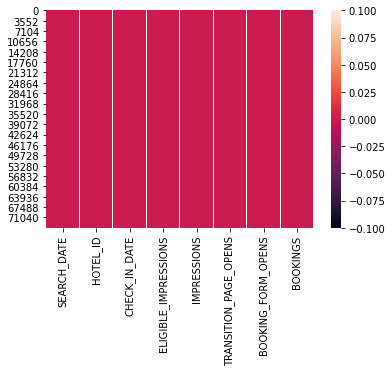

In [9]:
#visualization to analyze for missing values 

sns.heatmap(df.isnull())

#so from the heatmap and seeing the above results we found'
#that there is no missing values present in the datastet
#so we can go further for our analysing 


# checking for duplicated values in the dataset  

In [10]:
#checking for duplicated values in the dataset 

df.duplicated().sum()

#so there seems to be no duplicate values also present in the dataset 



0

In [11]:
#sorting the dataframe in  ascending order on the basis of 

df= df.sort_values(by="SEARCH_DATE")
df= df.reset_index(drop=True)
df.head()

,SEARCH_DATE,HOTEL_ID,CHECK_IN_DATE,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
0,2019-07-01,107590,2019-07-01,82,3,1,0,0
1,2019-07-01,169933,2019-07-01,118,13,4,1,0
2,2019-07-01,152618,2019-07-02,24,10,2,0,0
3,2019-07-01,252608,2019-07-01,28,1,0,0,0
4,2019-07-01,145352,2019-07-02,7,1,0,0,0


In [12]:
#looking for unique date in the dataset 

df["SEARCH_DATE"].unique()[:5]

array(['2019-07-01T00:00:00.000000000', '2019-07-02T00:00:00.000000000',
       '2019-07-03T00:00:00.000000000', '2019-07-04T00:00:00.000000000',
       '2019-07-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
df["SEARCH_DATE"].nunique()

77

In [14]:
df["CHECK_IN_DATE"].unique()[:5]

array(['2019-07-01T00:00:00.000000000', '2019-07-02T00:00:00.000000000',
       '2019-09-20T00:00:00.000000000', '2019-07-03T00:00:00.000000000',
       '2019-07-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
df["CHECK_IN_DATE"].nunique()

186

# general statistics of the data 

In [16]:
# general statistics for the data 

df.describe(include = "all").round(2)


,SEARCH_DATE,HOTEL_ID,CHECK_IN_DATE,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
count,74582,74582.0,74582,74582.00,74582.00,74582.00,74582.00,74582.00
unique,77,19149.0,186,NaN,NaN,NaN,NaN,NaN
top,2019-08-31 00:00:00,139402.0,2019-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1528,295.0,2155,NaN,NaN,NaN,NaN,NaN
first,2019-07-01 00:00:00,NaN,2019-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2019-09-15 00:00:00,NaN,2020-01-14 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,53.98,11.12,2.48,0.22,0.00
std,NaN,NaN,NaN,134.73,29.39,6.67,0.95,0.05
min,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,NaN,7.00,2.00,0.00,0.00,0.00


In [ ]:
# #Impressions :--->>>

# 1.so from general statistics we have seen that date range is from july 2019 to september 2019 for 
# search _date  also as mentioned in the question 

# search_date column : ==
# min_date of search_date column = 2019-07-01 00:00:00
# max_date of search_date column = 2019-09-15 00:00:00
# unique dates count in search_date column = 77
# most number of searched occur on date = 2019-08-31 00:00:00 and frequency = 1528

# similary for "check_in_date" column= range of date values in the dataset is as given 

# min_date of check_in_date column = 2019-07-01 00:00:00	
# max_date of check_in_date column = 2020-01-14 00:00:00
# unique dates count in check_in_date column = 186

# most number of check_in occur on date = 2019-08-31 00:00:00 and frequency = 2155

# 2.aslo talking about the hotel_ids :- 

#   unique hotel_ids count = 19149 
#   most number of times booked hotel_id = ""139402"" and frequence = 295
  
  
 
# 3.as we have recurrent values in dataset about user related to search_date so talking about other variables 
#   is not valid at present .
#   To get better overview we need to group by the data on search_date to derive further information
#   with respect to date wise interpretation 


In [17]:
#just a general view to see for the data related to max_search_date 
df[df["SEARCH_DATE"]==datetime.datetime(2019,8,31)].head()

,SEARCH_DATE,HOTEL_ID,CHECK_IN_DATE,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
58018,2019-08-31,108029,2019-09-02,47,7,2,0,0
58019,2019-08-31,149730,2019-08-31,45,5,1,0,0
58020,2019-08-31,148501,2019-09-01,14,3,1,0,0
58021,2019-08-31,647018,2019-08-31,39,6,2,0,0
58022,2019-08-31,126453,2019-09-23,3,1,0,0,0


In [18]:
#each day count of users specific to search_date

(df["SEARCH_DATE"].value_counts())[:5]

2019-08-31    1528
2019-08-30    1433
2019-08-16    1352
2019-09-01    1327
2019-08-17    1309
Name: SEARCH_DATE, dtype: int64

In [19]:
(df["SEARCH_DATE"].value_counts(normalize=True)*100)[:5]

2019-08-31    2.048752
2019-08-30    1.921375
2019-08-16    1.812770
2019-09-01    1.779250
2019-08-17    1.755115
Name: SEARCH_DATE, dtype: float64

In [20]:
#each day count of users specific to check_in_date 

df["CHECK_IN_DATE"].value_counts()[:5]

2019-08-31    2155
2019-08-17    1955
2019-08-30    1869
2019-08-24    1848
2019-09-14    1813
Name: CHECK_IN_DATE, dtype: int64

In [21]:
(df["CHECK_IN_DATE"].value_counts(normalize=True)*100)[:5]

2019-08-31    2.889437
2019-08-17    2.621276
2019-08-30    2.505967
2019-08-24    2.477810
2019-09-14    2.430881
Name: CHECK_IN_DATE, dtype: float64

# # Question 1

Using the attached data,
find 1-2 things about our booking funnel that you think are important to track 
and then create 5 visualizations that would help you track that metric:

What other data sources would you add assuming they were available?
Please prepare your presentation for a business audience but be ready to answer technical questions (perhaps in an appendix).

In [ ]:
# 1-2 things about our booking funnel that you think are important to track

# answer :---->>

# 1. daily summary of the data related to booking of searched_date 
#    ranging from july 2019 to september 2019 .
#    the idea is : 
#    to group the data on search_date and then aggrgating the sum of 
#    other relevant information to track the daily metrics and 
#    to get an idea about snaptravels business on daily basis i.e. what's the
#    count of total number of booking on an average on a given day 
   
   
 
# 2. we can also track information related to hotel 
#    ids that on particular date which hotel_id is booked maximum time
#    and also we can generate the summary statistics related to each hotel_id
#    if required on daily basis i.e on a given 
#    day whats the chance that people will book that particular
#    hotel from snaptravels hotel ads
   
# 3. we can also check the trend of other numeric information related 
#    to search date to find out if is there any seasonality 
#    factor availaible or not like is there any possibility 
#    like bookings are higher in mid of the month or end of the month or 
#    so 
   
# 4. checking for outliers is also required and removal
#    of outliers is also necessary going further 


# 5. next we can also use TIME SERIES FORECASTING APPROACH like 
#    ARIMA OR SARIMA to forecast the booking based on the past 
#    data availaible 

# group by on search_date to see for the values to comment related to daiy happening

In [22]:
#group by on search_date to see for the values

new_df = df.groupby(["SEARCH_DATE"]).sum()
new_df.head()

,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
SEARCH_DATE,,,,,
2019-07-01,40792,6446,1423,119,1
2019-07-02,53443,10318,2308,190,1
2019-07-03,81992,18516,4105,391,6
2019-07-04,46390,10567,2319,206,1
2019-07-05,72573,17200,4033,395,5


In [23]:
#decibring the information related to each search_date 

new_df.describe()




,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,52289.090909,10766.792208,2403.636364,213.532468,1.558442
std,20290.617438,5790.215641,1319.714043,153.515264,2.812068
min,22905.000000,4522.000000,958.000000,61.000000,0.000000
25%,37742.000000,6843.000000,1502.000000,118.000000,0.000000
50%,47253.000000,8813.000000,1944.000000,160.000000,1.000000
75%,62295.000000,13726.000000,3096.000000,281.000000,2.000000
max,117948.000000,39833.000000,9129.000000,1058.000000,19.000000


In [ ]:
#impression on each_day_search data :>>>>>>>>>>

# 1.mean value for eligible impression per day is around 52289

# 2.max value for eligible impression per day is around 1lakh

# 3.talking about impressions variable :- we have mean value of 
#   around 10766 (10.5k) on daily basis for snaptravel

# 4.maximum impression value on a particular day is around 39k 
#   and minimum impression on given day is around 4522

# 5.talking about transition pages :->> on an average in a 
#   day  2k times transition page is opened .

# 6.maximum value on a single day for transition_page_open is 
#   around 9k and minimum value is around 958

# 7. taking about booking form :>> 
#   on an average booking form opens up around 200 times in a given day

# 8. maximum number of times booking form open on a given day 
#    is 1058 times and minimum is 61

# 9.while talking about bookings on an average 1.5 means 
#   around 2 people compelte the booking using snaptravel on daily basis

# 10 maximum count of  completed booking has occured on a given day 
#   is 19 and minimum is 0 it means there are days when there is
#   no booking done from snaptrevels service



ELIGIBLE_IMPRESSIONS     1.185322
IMPRESSIONS              2.212769
TRANSITION_PAGE_OPENS    2.260616
BOOKING_FORM_OPENS       2.680979
BOOKINGS                 3.882307
dtype: float64

<Figure size 1080x1080 with 0 Axes>

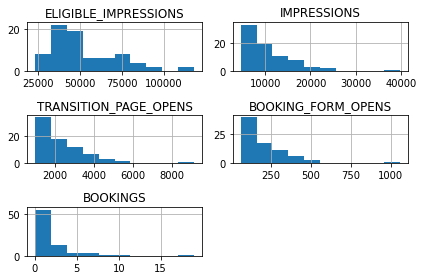

In [24]:
#plotting the histogram for the numeric data 

plt.figure(figsize=(15,15))
new_df.hist()
plt.tight_layout()
new_df.skew()

#the data is not distributed normally 
#there seems to be +ve skewness is all variables 
#which means there are outliers which can affect the mean values 

<AxesSubplot:>

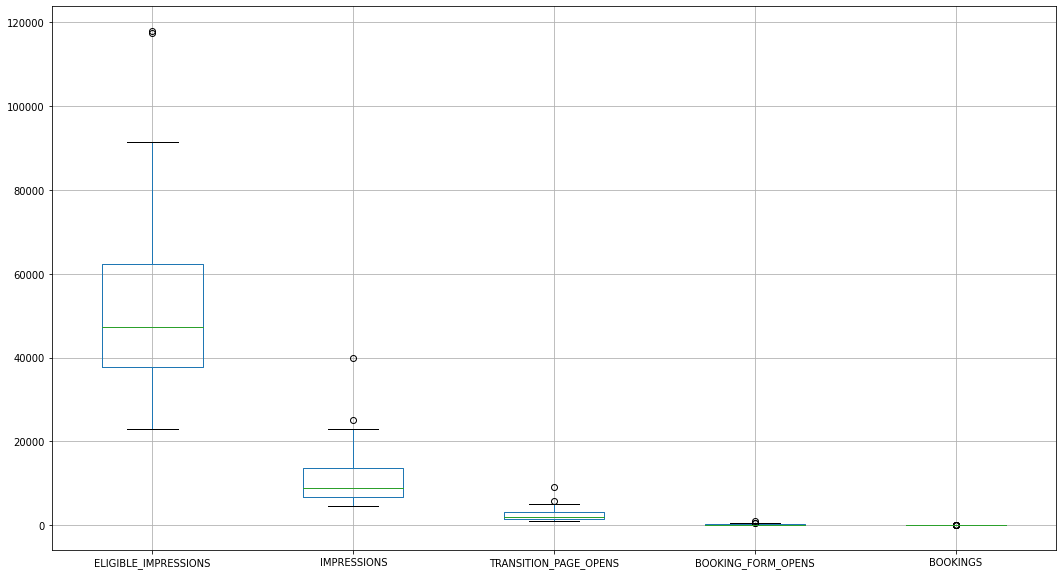

In [25]:
#visualizing the boxplot
plt.figure(figsize=(18,10))
new_df.boxplot()

#plotting the boxplot to look for the outliers in the dataset

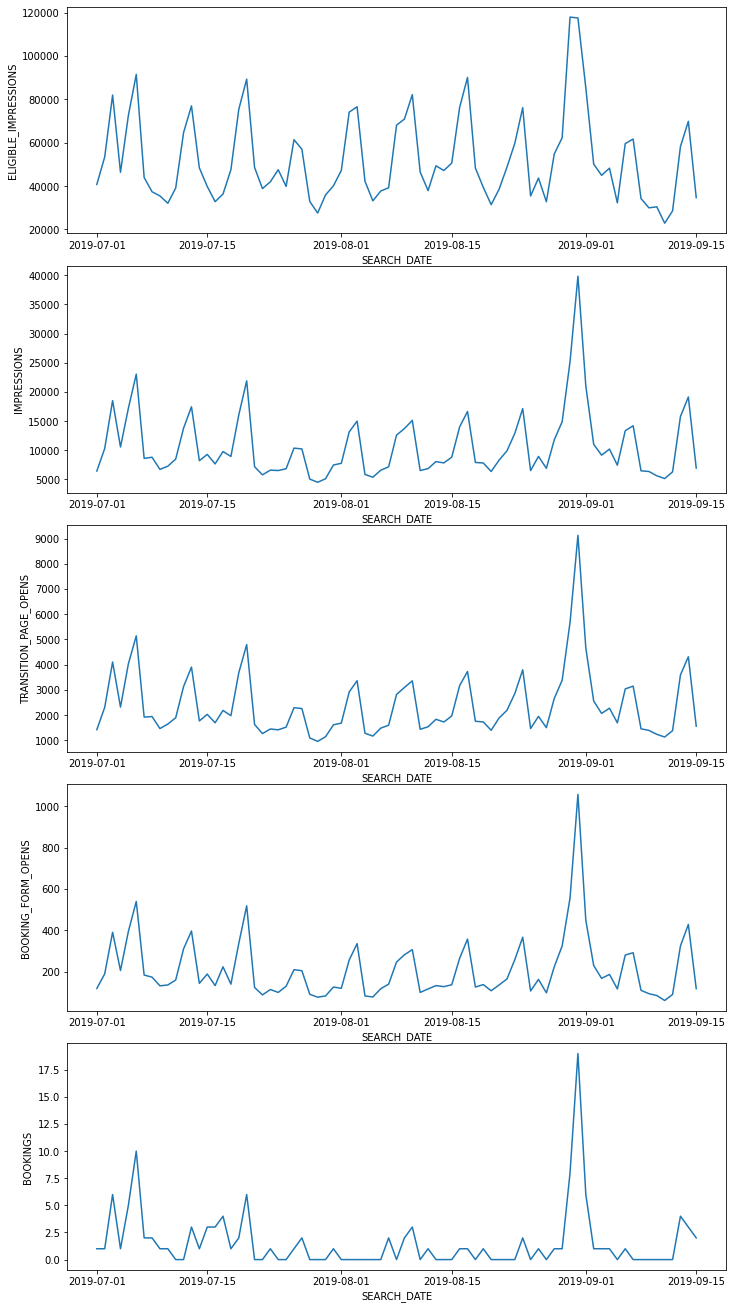

In [26]:
#visualization related to search_date and booking form_opens 



fig,ax = plt.subplots(5,1,figsize=(10,18))

for var,subplot in zip(new_df.columns,ax.flatten()):
   
    sns.lineplot(new_df.index,new_df[var], ax=subplot)
    plt.tight_layout(pad=0.05)

#so from the plot we can see that 

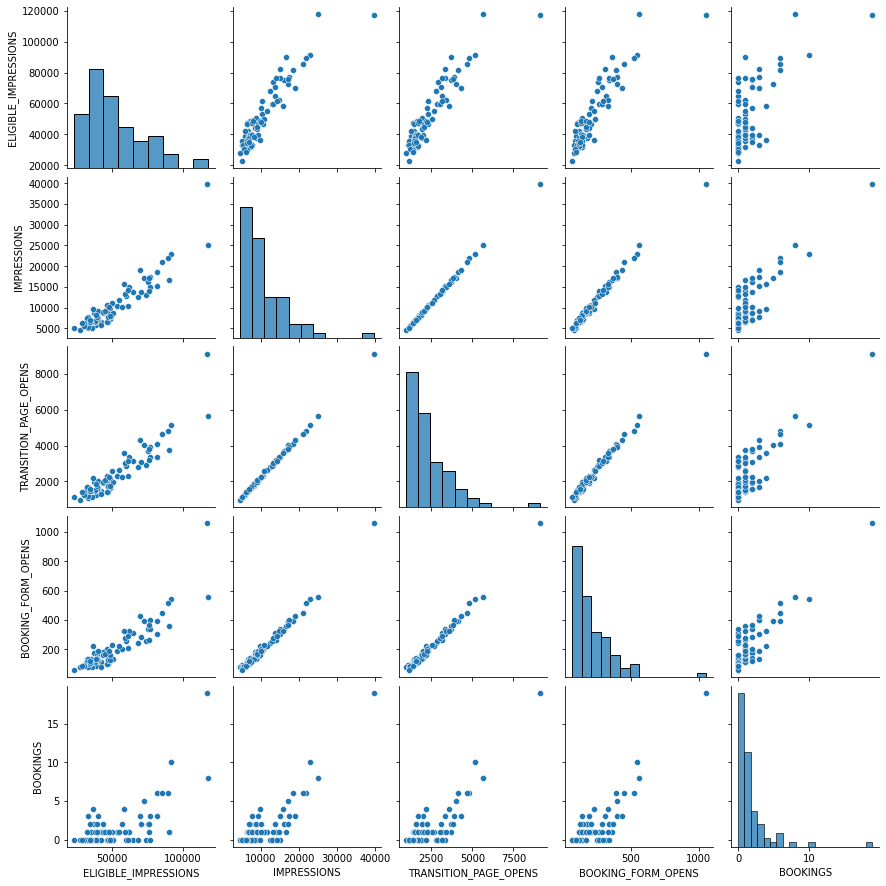

In [27]:
#to see the variables performance 

sns.pairplot(new_df)

<AxesSubplot:>

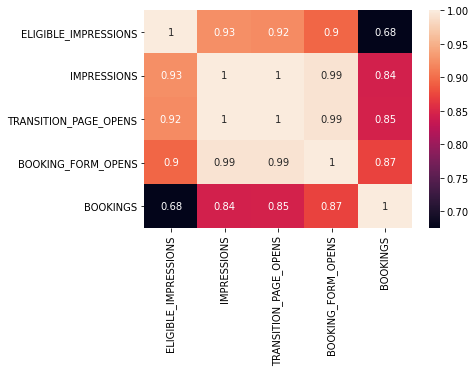

In [28]:
#plotting the correlation heatmap for tracking the correlation on daily search data related
#to snaptravel 

sns.heatmap(new_df.corr(),annot=True)


#so from the heatmap it is clearly visible that on daily basis 
#no of complete booking is directly dependent on all the other numeric variables 
# and also we can think about it practically also as more number of impression will generate which can lead to 
#more number of people tracking the add and clicking or opening the transition page and booking form to complete the booking


In [31]:
# we can also check about which hotel_id is booked for maximum time on give day 

df.groupby(["SEARCH_DATE","HOTEL_ID"]).sum().head()

ELIGIBLE_IMPRESSIONS  IMPRESSIONS  \
SEARCH_DATE HOTEL_ID                                      
2019-07-01  4110                         0            0   
            6295                         0            0   
            8957                        73           28   
            21227                        0            0   
            105302                       0            0   

                      TRANSITION_PAGE_OPENS  BOOKING_FORM_OPENS  BOOKINGS  
SEARCH_DATE HOTEL_ID                                                       
2019-07-01  4110                          0                   0         0  
            6295                          0                   0         0  
            8957                          6                   0         0  
            21227                         0                   0         0  
            105302                        0                   0         0

In [ ]:
# #intepretation >>-----

# from the above data and created eda there are many things and matrices to explore related to

# 1. daily search_date we have found out when there are maximum_impressions and bookings 
#    i.e what is the trend on daily basis related to booking on snaptravel
    
# 2. we also created summary by aggregating the data on search_date and then finding out about
#    mean score related to booking on daily basis 
   
# 3. we also searched and looked for maximum and minimum booking 

# 4. we also had seen the graphs and plot related to finding out the correlation between the
#    variables and we found out that booking is directly correlated with the other variables 
#    such as imressions,booking_form_opens
   
  

 
#  5. next we can also generate the percentage impression and percentage_booking_funnel :-> 
#   perc_impression_funnel :-- ((impression/eligible impression)*100) and 
#   percentage booking funnel :--- ((booking/booking_form_opens)*100) 
#    can also be calculated to get better idea 


# What other data sources would you add assuming they were available? 

# answer :-->>

# 1. as there is only information related to hotel_id if data related to mapping of hotel_id to 
#    name of the hotel and other information related to hotels like ratings by people,
#    location etc would givem nice indepth idea about choosing particular hotel by people 
#    and may be we could prepare a good recommendation and ads regarding to that particular hotel.
   
# 2. also we can generate more information using pivot table by combining and creating multiindex dataframes


# 3. we can generate impression share i.e. it is the percentage of impressions that our ads 
#    receive compared to the total number of impressions that our ads could get. 
#     Impression share = impressions / total eligible impressions.


In [32]:

#new column is added as impression share 
new_df["Impression_share"] = (new_df["IMPRESSIONS"]/new_df["ELIGIBLE_IMPRESSIONS"])*100
new_df.head()

,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS,Impression_share
SEARCH_DATE,,,,,,
2019-07-01,40792,6446,1423,119,1,15.802118
2019-07-02,53443,10318,2308,190,1,19.306551
2019-07-03,81992,18516,4105,391,6,22.582691
2019-07-04,46390,10567,2319,206,1,22.778616
2019-07-05,72573,17200,4033,395,5,23.700274


In [36]:
#maximum impression share was on august 31,2019

new_df[new_df["Impression_share"]==new_df["Impression_share"].max()]

,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,TRANSITION_PAGE_OPENS,BOOKING_FORM_OPENS,BOOKINGS,Impression_share
SEARCH_DATE,,,,,,
2019-08-31,117557,39833,9129,1058,19,33.883988


# next we can also use TIME SERIES FORECASTING

# APPROACH like ARIMA OR SARIMA 
# to forecast the booking based on the 
# past booking data availaible for snaptravel website

# Question 2 

If you were tasked with expanding the snaptravel business into a new area of the world,

how would you approach that problem? 

What data would you need? Who would you involve? Provide a brief description of your process 


(300 words or less).

In [ ]:
#to expand the snaptravel business into new area of the world we 
#have to look and expand our hotels list and campaigns with respect
#to hotels accross the various countries and we need to create
#ads campaigns in most relevant way that our companies ads should
#get the maximum impressions.

#also we need to make the interface and booking process
#easy and fast it means the new user should easily
#walkthough the website and can book the hotel without
#problem .

#a good customer support team should also be there to help
#the customers in resolving the queries in fast way

#a good discounted and prominent pricing strategy needs to be 
#followed to attract the customers 

#the data related to country ,hotel_ids,impression share 
#can give us idea about which country to choose 
#by seeing the country-wise impression share and also
#where we are getting less eligible impression and relatively
#our impression share is good

#a good recommendation system is also a key factor
#for any business i.e showing the audience most 
#appropriate option to choose from when they 
#are visiting our website.The best example is 
#netflix who has increased their profits to 
#much more by making a good and perosnalized recommendation
#system for the audience .

#we can track the performance of our ads and can decide on various things 
#to improve our business and earnings 